In [1]:
import numpy as np
from ddqla.agents import BaseAgent
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers.legacy import Adam
from keras.losses import MeanSquaredError


class Imex(BaseAgent):
    __ACTIONS = 4
    __STARTUP_ENVIRONMENT = np.asarray([7, 4, 1, 4], dtype=np.float32)
    __MATRIX_SIDE_DIM = 9
    __DENSE_DIM = 2048

    def __init__(self):
        super().__init__(
            Imex.__ACTIONS,
            Imex.__STARTUP_ENVIRONMENT,
            fit_each_n_steps=600,
            cumulative_rewards_max_length=600
        )

    def _get_model(self, state_features):
        inputs = Input(shape=(state_features,))
        dense = Dense(Imex.__DENSE_DIM, activation='swish')(inputs)
        dense = Dense(Imex.__DENSE_DIM, activation='swish')(dense)
        outputs = Dense(Imex.__ACTIONS, activation='linear')(dense)
        model = Model(inputs=inputs, outputs=outputs)
        model.compile(optimizer=Adam(), loss=MeanSquaredError())
        #model.summary()
        return model

    def reset_state(self):
        self._state = Imex.__STARTUP_ENVIRONMENT

    def _get_reward(self, action, environment):
        self.environment_log.append(environment)
        reward = -1
        new_pos = np.asarray([self._state[0], self._state[1]])
        match action:
            case 0:  # up
                new_pos[1] -= 1
            case 1:  # right
                new_pos[0] += 1
            case 2:  # down
                new_pos[1] += 1
            case 3:  # left
                new_pos[0] -= 1
        if 0 <= new_pos[0] < Imex.__MATRIX_SIDE_DIM and 0 <= new_pos[1] < Imex.__MATRIX_SIDE_DIM:
            environment[0] = new_pos[0]
            environment[1] = new_pos[1]
            self._state[0] = new_pos[0]
            self._state[1] = new_pos[1]
        if new_pos[0] == self._state[2] and new_pos[1] == self._state[3]:
            reward = 6
            self.reset_state()
        return reward


In [2]:
imex = Imex()

In [3]:
for step in range(0, 20000):
    imex.step()
    if step % 700 == 0 and imex.is_memory_ready():
        rewards = imex.test(600)
        cum_rewards = imex.get_last_cumulative_rewards()
        print('#', step, '  CR: ', np.sum(cum_rewards), '  R: ', rewards)

# 1400   CR:  -516   R:  -600
# 2100   CR:  -593   R:  -600
# 2800   CR:  -600   R:  -600
# 3500   CR:  -565   R:  -600
# 4200   CR:  -537   R:  -600
# 4900   CR:  -558   R:  -600
# 5600   CR:  -530   R:  -600
# 6300   CR:  -544   R:  -600
# 7000   CR:  -600   R:  -600
# 7700   CR:  -523   R:  -600
# 8400   CR:  -593   R:  -593
# 9100   CR:  -509   R:  -600
# 9800   CR:  -565   R:  -600
# 10500   CR:  -586   R:  -600
# 11200   CR:  -523   R:  -600
# 11900   CR:  -481   R:  -600
# 12600   CR:  -558   R:  -600
# 13300   CR:  -558   R:  -600
# 14000   CR:  -558   R:  -600
# 14700   CR:  -523   R:  -600
# 15400   CR:  -565   R:  -600
# 16100   CR:  -558   R:  -600
# 16800   CR:  -593   R:  -600
# 17500   CR:  -523   R:  -600
# 18200   CR:  -565   R:  -593
# 18900   CR:  -516   R:  -600
# 19600   CR:  -551   R:  -593


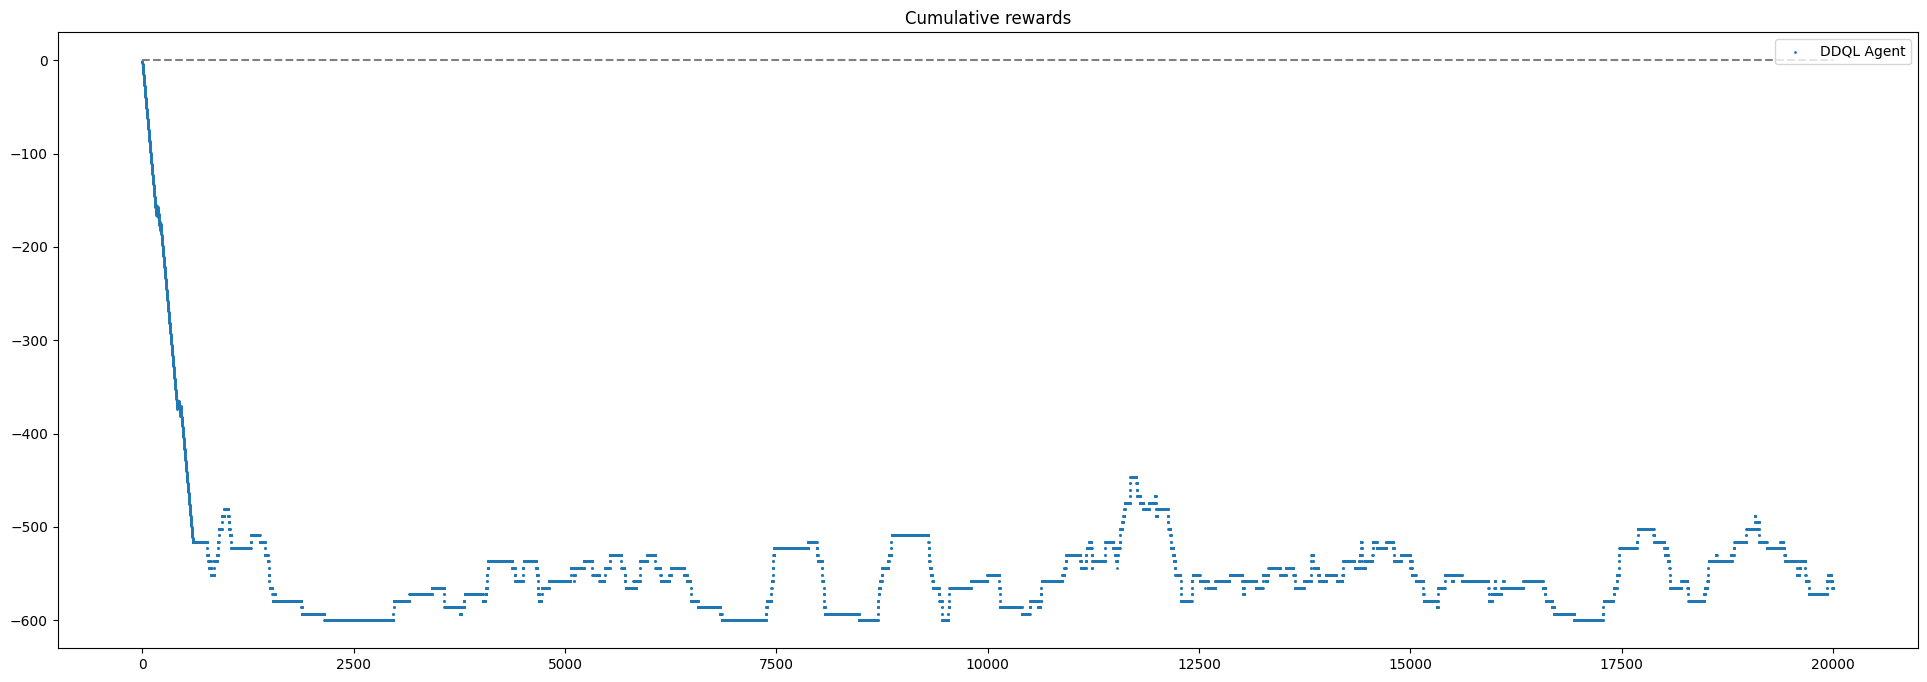

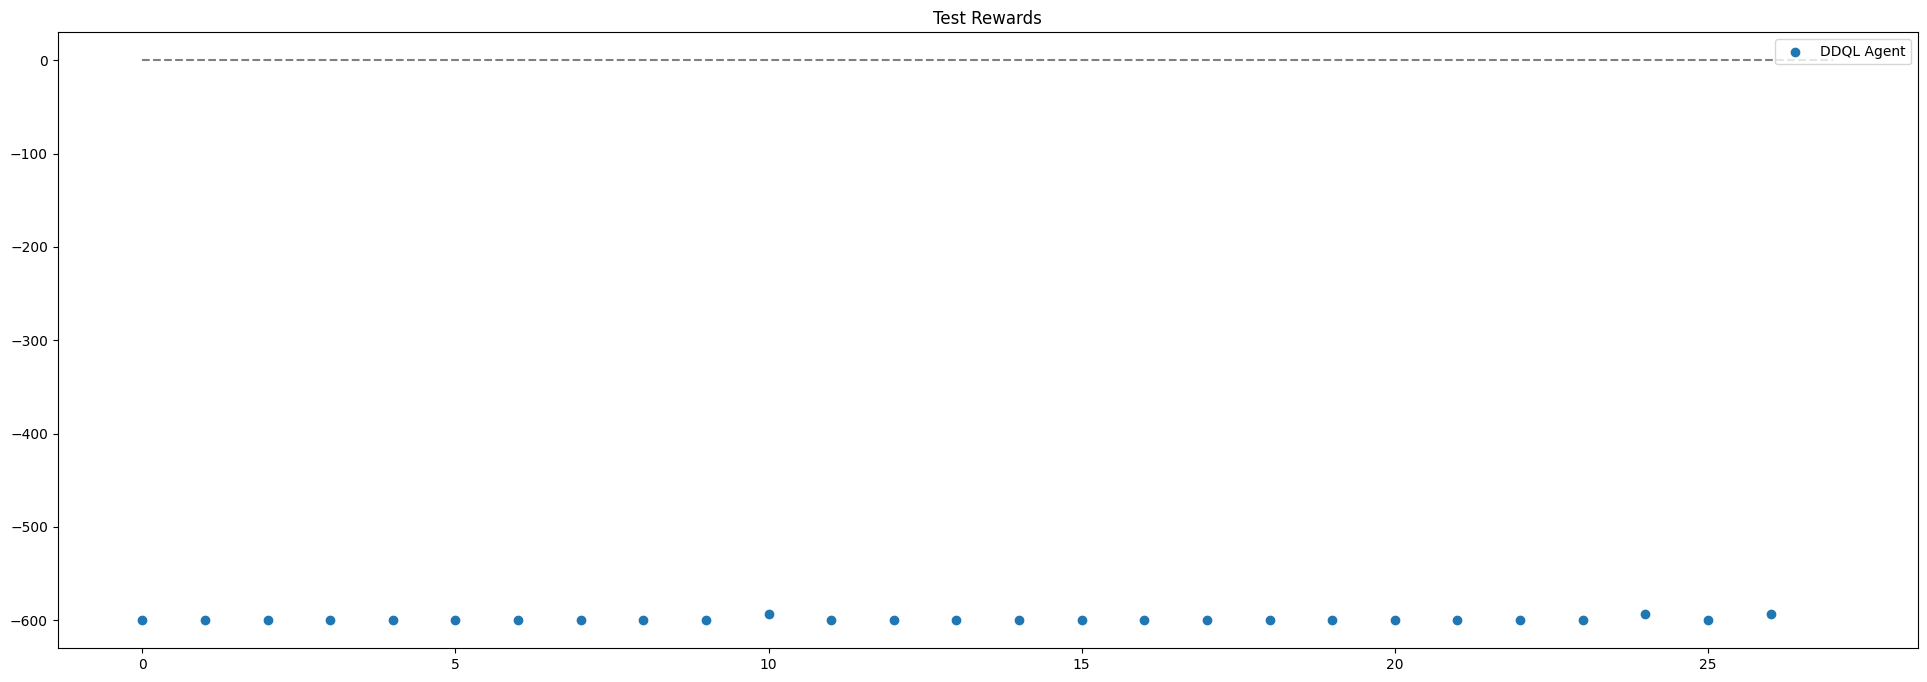

In [4]:
imex.summary()